In [1]:
import numpy
import torchvision

train = torchvision.datasets.MNIST('mnist', train = True, download = False)
test = torchvision.datasets.MNIST('mnist', train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) / 255 for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) / 255 for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

In [5]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = True, return_diagrams = False)
extractor = extractor.fit(train_images, "12/train")
train_features = extractor.transform(train_images, "12/train")
test_features = extractor.transform(test_images, "12/test")

Calculating inverted images
Got the result from ./12/train/greyscale/features.npy
Got the result from ./12/train/greyscale/features.npy
Got the result from ./12/train/inverted_greyscale/features.npy
Got the result from ./12/train/inverted_greyscale/features.npy
Fitting filtrations
Calculated radial centers for images of size 28x28: [ 4 10 17 23]x[ 4 10 17 23]
Fitting filtration 1/72: 2/HeightFiltrartion_-1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_-1_-1/features.npy
Fitting filtration 2/72: 2/HeightFiltrartion_1_1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_1/features.npy
Fitting filtration 3/72: 2/HeightFiltrartion_1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_-1/features.npy
Fitting filtration 4/72: 2/HeightFiltrartion_-1_1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_-1_1/features.npy
Fitting filtration 5/72: 2/HeightFiltrartion_0_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_0

In [6]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = True, return_diagrams = True)
extractor = extractor.fit(train_images, "12/train")
train_diagrams = extractor.transform(train_images, "12/train")
test_diagrams = extractor.transform(test_images, "12/test")

Calculating inverted images
Got the result from ./12/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./12/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./12/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./12/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtrations
Calculated radial centers for images of size 28x28: [ 4 10 17 23]x[ 4 10 17 23]
Fitting filtration 1/72: 2/HeightFiltrartion_-1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 2/72: 2/HeightFiltrartion_1_1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 3/72: 2/HeightFiltrartion_1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_-1/diagrams.npy

Dataset: processing diagrams:  43%|████▎     | 32/74 [00:30<00:40,  1.04it/s]d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Dataset: processing diagrams: 100%|██████████| 74/74 [01:31<00:00,  1.24s/it]


Constructed a dataset of 60000 images of shape torch.Size([1, 28, 28]) with 148 diagrams and 10278 features


Dataset: processing diagrams: 100%|██████████| 74/74 [00:12<00:00,  5.95it/s]


Constructed a dataset of 10000 images of shape torch.Size([1, 28, 28]) with 148 diagrams and 10278 features
Trying KNeighborsClassifier - KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Got the result from ./12/predictions/KNeighborsClassifier.npy
{'classifier': 'Метод k ближайших соседей', 'Accuracy': 0.9371, 'AUC-ROC': 0.9966252743309251, 'Precision': 0.9377276258714533, 'Recall': 0.936356502542585, 'F1-score': 0.9365938283058943, 'TOP-2 Accuracy': 0.9751, 'TOP-3 Accuracy': 0.9841, 'TOP-5 Accuracy': 0.9929, 'TOP-7 Accuracy': 0.9968, 'TOP-9 Accuracy': 0.9993}
Trying RandomForestClassifier - RandomForestClassifier(n_jobs=-1, random_state=42)
Got the result from ./12/predictions/RandomForestClassifier.npy
{'classifier': 'Случайный лес', 'Accuracy': 0.9818, 'AUC-ROC': 0.9996915350354001, 'Precision': 0.9816253524321816, 'Recall': 0.9815538764751166, 'F1-score': 0.9815710678589763, 'TOP-2 Accuracy': 0.9936, 'TOP-3 Accuracy': 0.9976, 'TOP-5 Accuracy': 0.9992, 'TOP-7 Accuracy': 0.9998, 'TOP

,classifier,Accuracy,AUC-ROC,Precision,Recall,F1-score,TOP-2 Accuracy,TOP-3 Accuracy,TOP-5 Accuracy,TOP-7 Accuracy,TOP-9 Accuracy
0,Метод k ближайших соседей,0.9371,0.996625,0.937728,0.936357,0.936594,0.9751,0.9841,0.9929,0.9968,0.9993
1,Случайный лес,0.9818,0.999692,0.981625,0.981554,0.981571,0.9936,0.9976,0.9992,0.9998,1.0000
2,Град. бустинг на основе гистограм,0.9755,0.999572,0.975290,0.975182,0.975216,0.9945,0.9984,0.9996,0.9999,1.0000
3,CatBoost,0.9883,0.999919,0.988263,0.988225,0.988240,0.9979,0.9995,0.9998,1.0000,1.0000
4,XGBoost,0.9833,0.999826,0.983148,0.983106,0.983116,0.9959,0.9984,0.9995,1.0000,1.0000
5,Нейронная сеть для тополог. признаков,0.9907,0.999903,0.990634,0.990653,0.990636,0.9972,0.9980,0.9994,0.9999,1.0000
6,Обучаемая векторизация диаграмм,0.9842,0.999775,0.984154,0.984105,0.984117,0.9960,0.9985,0.9994,0.9999,1.0000
7,ResNet50 – базовая модель,0.9953,0.999967,0.995252,0.995256,0.995251,0.9992,0.9998,0.9999,1.0000,1.0000
8,Комбинированная нейронная сеть,0.9912,0.999933,0.991101,0.991162,0.991125,0.9970,0.9983,0.9990,0.9998,1.0000


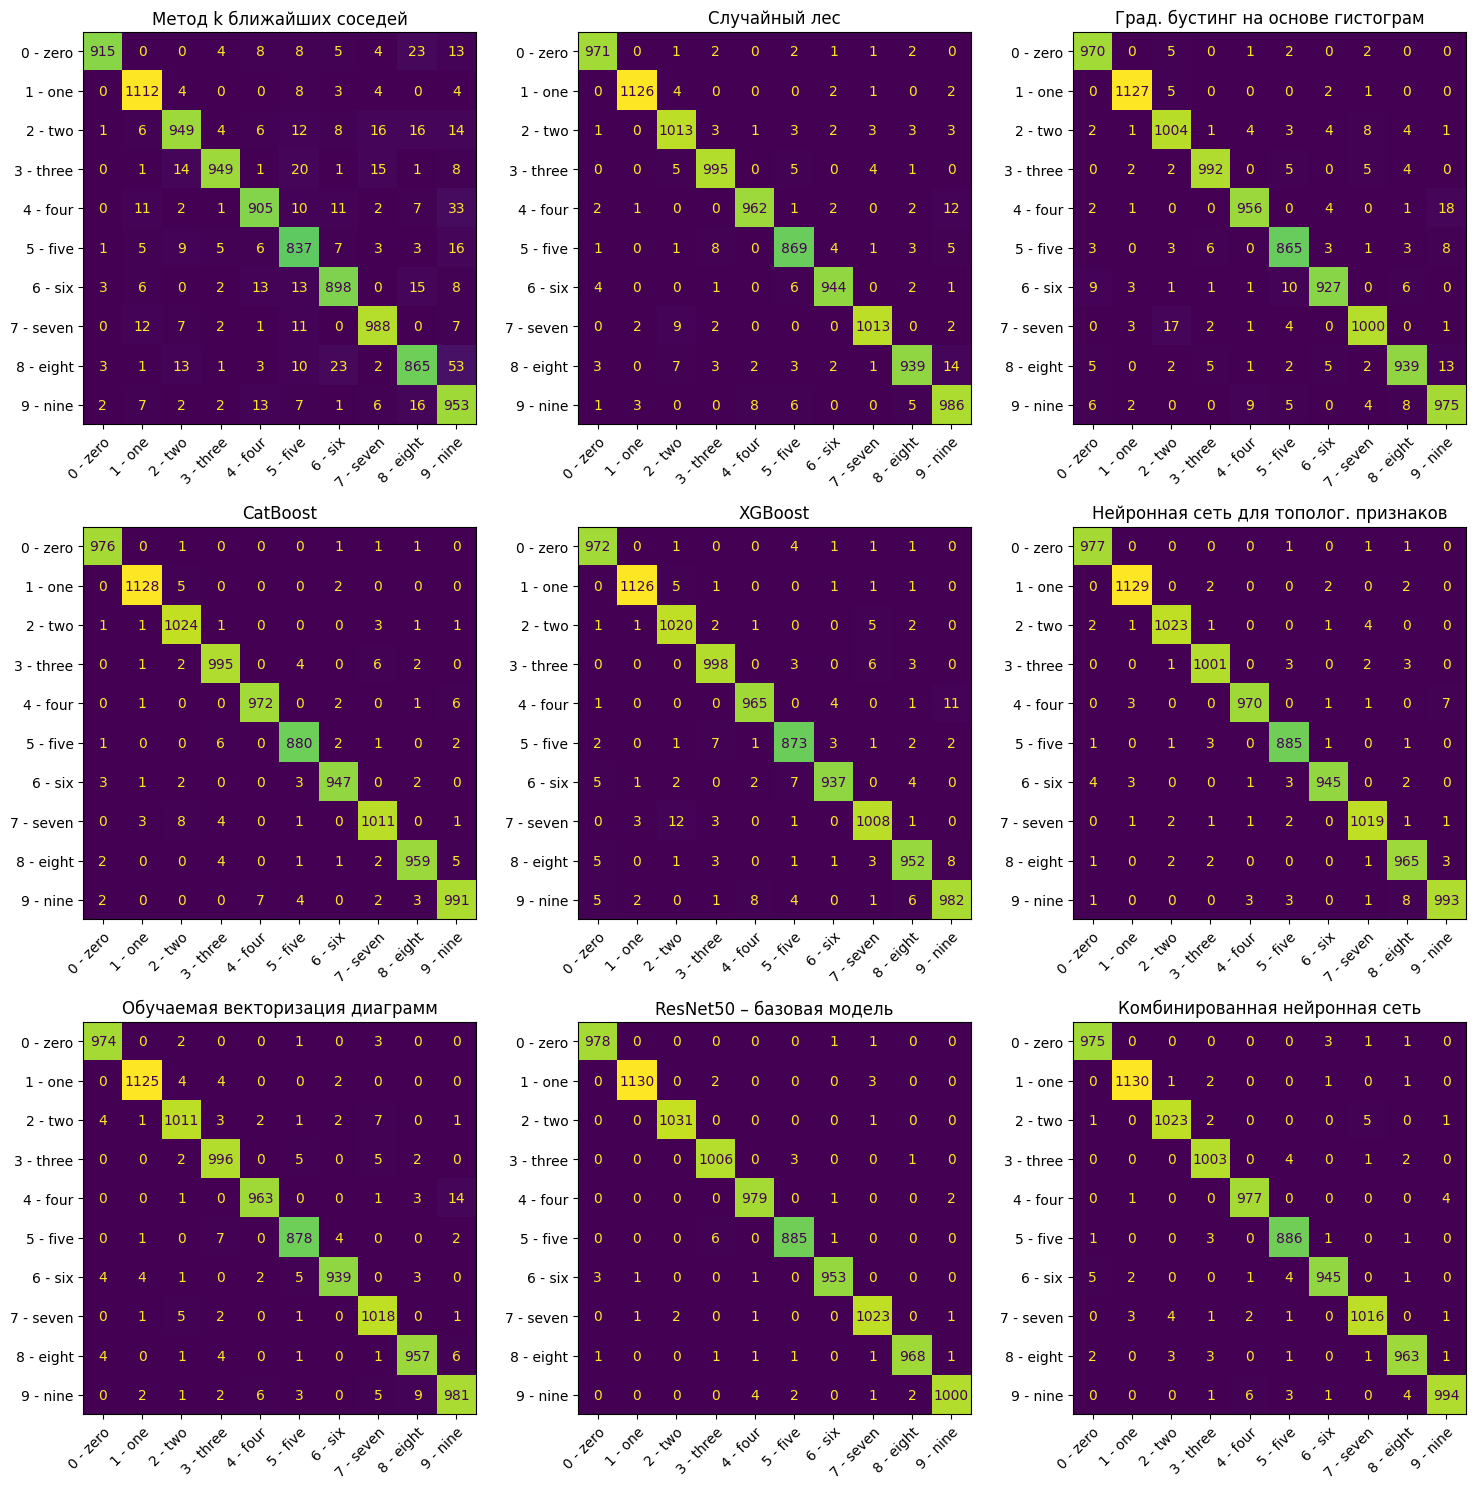

In [8]:
import cvtda.classification

cvtda.classification.classify(
    train_images, train_features, train_labels, train_diagrams,
    test_images, test_features, test_labels, test_diagrams,
    label_names = train.classes, dump_name = "12/predictions",
    only_get_from_dump = False
)

In [9]:
import numpy
import torchvision

test = torchvision.datasets.MNIST('mnist', train = False, download = False)

test_images = numpy.array([ numpy.array(item[0]) / 255 for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

In [10]:
predictions = numpy.argmax(numpy.load("12/predictions/NNClassifier_features.npy"), axis = 1)
part1 = numpy.where((predictions == 8) & (test_labels == 9))
print(part1)

part2 = numpy.where((predictions == 9) & (test_labels == 4))
print(part2)

(array([ 193,  813, 6560, 6571, 6632, 9530, 9642, 9692], dtype=int64),)
(array([1440, 2130, 2771, 5068, 8416, 8527, 9792], dtype=int64),)


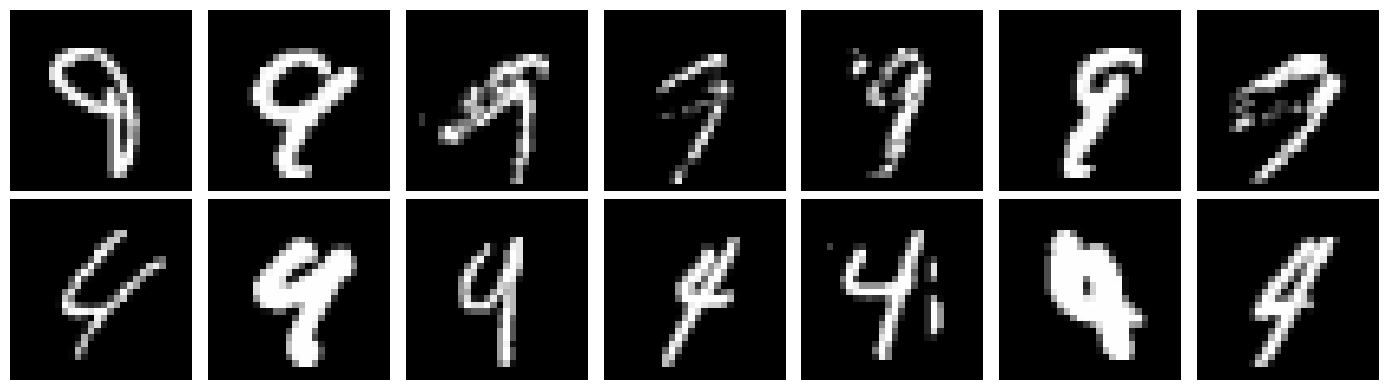

In [13]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(2, 7, figsize = (14, 4))

part1 = [ 193,  813, 6560, 6571, 9692, 9530, 9642 ]
for i in range(7):
    axes[0][i].imshow(test_images[part1[i]], cmap = "gray")
    axes[0][i].axis(False)


part2 = [
    1440, 2130, 2771, 5068, 8416, 8527, 9792
]
for i in range(7):
    axes[1][i].imshow(test_images[part2[i]], cmap = "gray")
    axes[1][i].axis(False)

figure.tight_layout()

plt.savefig("12/predictions/error_examples.svg")
plt.savefig("12/predictions/error_examples.png")